# Assessing the Impact of Product Specifications and Brand Origin on the Pricing of Mechanical Keyboards in 2025

## Problem Statement
Global supply chains have undergone significant political and economic disruption in recent years, particularly in the technology and consumer electronics industries. 

Mechanical keyboards, an essential component of modern computing and creative work, have become a notable example of how Chinese manufacturers have entered the enthusiast market with competitive alternatives.

Historically, branding and Western design heritage contributed greatly to pricing. However, with increased transparency and direct-to-consumer models from Chinese factories, this may no longer hold true.

## Goal
This project aims to use mechanical keyboard listings as a case study to explore whether technical specifications and country/brand of origin still meaningfully influence pricing in 2025.

## Hypothesis
H₀ (Null Hypothesis): Product specifications and brand origin (e.g., Chinese vs Western brands) have no significant effect on price.

H₁ (Alternative Hypothesis): Product specifications and brand origin significantly affect price.

## Objectives
- Determine which features (e.g., switch type, brand, layout, connectivity) influence pricing.

- Analyze whether branding and origin remain significant predictors of pricing.

- Provide insights into broader trends of consumer electronics pricing post-supply-chain globalization.



# Seeing what data we are working with

In [30]:
import pandas as pd
import numpy as np

df = pd.read_csv('keebfinder_keyboards_rev9.csv')


In [31]:
df.shape

(2368, 13)

In [32]:
df.isna().sum()

category         0
brand            0
title            0
price            0
layout           0
mount            0
hall_effect      0
hotswap          0
case_material    0
backlight        0
connectivity     0
screen           0
knob             0
dtype: int64

# Preprocessing
- knowing there are missing values, determine what they are and deal with them
- Find out how to categorize brands to define what is high end, mid tier, or low tier, since this was not included in the dataset
- clean & normalize data to be prepared to be shoved into the ML model

In [33]:
# check for all the missing values in the layout column
df['layout'].unique()

array(['60%', '65%', 'Unknown', '80%', '100%', '75%', '96%', '98%', '95%',
       '40%', '68%', '64%', '66%', '85%', '90%', '70%', '97%', '50%',
       '87%', '78%', '84%'], dtype=object)

In [34]:
#df['layout'] = df['layout'].str.replace(',', '')

In [35]:
#check for all the unique values in the mount column
df['mount'].unique()

array(['Plate Mount', 'Gasket Mount', 'Top Mount', 'Unknown',
       'Tray Mount', 'Sandwich Mount', 'Bottom Mount', 'PCB Mount'],
      dtype=object)

In [36]:
#df['mount'] = df['mount'].str.replace(',', '')

In [37]:
df['case_material'].unique()

array(['Metal (likely Aluminium)', 'Unspecified(likely ABS plastic)'],
      dtype=object)

In [38]:
#df['case_material'] = df['case_material'].str.replace(',', '')

In [39]:
# check for all the unique values in the 'connectivity' column
df['connectivity'].unique()

array(['Wired', 'Unknown', 'Wireless'], dtype=object)

In [40]:
#df['connectivity'] = df['connectivity'].str.replace(',', '')

In [41]:
# fill missing values with 'Unknown' for categorical columns
df['layout'].fillna('Unknown', inplace=True)
df['mount'].fillna('Unknown', inplace=True)
df['case_material'].fillna('Unknown', inplace=True)
df['connectivity'].fillna('Unknown', inplace=True)

/var/folders/04/wngkl13j3hj0s528zj5lpnj00000gn/T/ipykernel_22429/2699668920.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['layout'].fillna('Unknown', inplace=True)
/var/folders/04/wngkl13j3hj0s528zj5lpnj00000gn/T/ipykernel_22429/2699668920.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [42]:
# minor mistake in the above code, lazy fix ^^
#df['case_material'].replace(to_replace="Unknown",
#         value="Unspecified(likely ABS plastic)", inplace=True)
#df['case_material'].replace(to_replace="Alu case",
#         value="Metal (likely Aluminium)", inplace=True)
#df.tail()


In [43]:
# # extract brand from title n make a new column
# df['brand'] = df['title'].str.split().str[0]
# # df.head()

# #reorder the columns to make brand go first
# df = df[['brand', 'title', 'price', 'layout', 'mount', 'hall_effect', 'hotswap', 'case_material', 'backlight', 'connectivity', 'screen', 'knob']]
# df.head()



# categorizing brands

## Price-Based Categorization with Brand Context

FLOW

- Calculate the average price for each brand

- Calculate the price range (min, max, standard deviation) for each brand

Use these metrics to categorize brands

This would help account for brands that offer both high-end and budget options. For example:
- If a brand's average price is high but has a wide range, it might be a "premium" brand that also offers budget options
- If a brand's average price is low with a narrow range, it's likely a "budget" brand
- If a brand's average price is moderate with some variation, it might be "midrange"


In [44]:
# df = df.drop('brand_category', axis=1)

# df.to_csv('keebfinder_keyboards_rev7.csv', index=False)

# #new brand categorization approach (!GPT SUGGESTION)
# # Calculate brand statistics (!GPT CODE)

# brand_stats = df.groupby('brand').agg({
#     'price': ['mean', 'min', 'max', 'std', 'count']
# }).reset_index()

# # # name cols
# brand_stats.columns = ['brand', 'avg_price', 'min_price', 'max_price', 'price_std', 'product_count']

# df_brand_stats = brand_stats.copy()

# df_brand_stats.to_csv('brand_stats.csv', index=False)

# # Calculate price percentiles for the entire dataset (!GPT CODE)

# # First, convert price strings to numeric values (removing '$' and ',' characters)
# df['price_numeric'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

# price_percentiles = df['price_numeric'].quantile([0.33, 0.66]) (!GPT CODE)

# # Define brand categories based on multiple metrics (!GPT SUGGESTION)

# (!GPT CODE)
# def categorize_brand(row):
#     avg_price = row['avg_price']
#     price_std = row['price_std']
#     price_range = row['max_price'] - row['min_price']
    
#     # Premium: High average price OR wide price range with high max

#     if avg_price > price_percentiles[0.66] or (price_range > 100 and row['max_price'] > price_percentiles[0.66]):
#         return 'premium'
#     # Budget: Low average price AND narrow price range

#     elif avg_price < price_percentiles[0.33] and price_range < 50:
#         return 'budget'
#     # Midrange: Everything else

#     else:
#         return 'midrange'

# # apply cats
# brand_stats['category'] = brand_stats.apply(categorize_brand, axis=1)

# # results
# print("\nPrice Percentiles:")
# print(f"33rd percentile: ${price_percentiles[0.33]:.2f}")
# print(f"66th percentile: ${price_percentiles[0.66]:.2f}")

# print("\nBrand Categories:")
# print(brand_stats[['brand', 'category', 'avg_price', 'min_price', 'max_price', 'product_count']].sort_values('avg_price', ascending=False))

# # ddd cats back 2 main dataframe
# df = df.merge(brand_stats[['brand', 'category']], on='brand', how='left')

# sahaja i want the brand_category to be the first column
#df = df[['brand_category','brand', 'title', 'price', 'layout', 'mount', 'hall_effect', 'hotswap', 'case_material', 'backlight', 'connectivity', 'screen', 'knob']]

# save new categorized dataset
#df.to_csv('keebfinder_keyboards_rev8.csv', index=False)

# Preparing the data for EDA / ML model

- Clean data, like columns price should be numeric, maybe layout convert to numeric too
- Normalize the data, so binary cols like hall effect, hotswap, backlight, screen, knob can all be converted to numeric values, eg. 0 | 1

In [45]:
df

,category,brand,title,price,layout,mount,hall_effect,hotswap,case_material,backlight,connectivity,screen,knob
0,budget,0.01,0.01 Z62,59.0,60%,Plate Mount,0,0,Metal (likely Aluminium),1,Wired,0,0
1,budget,0.01,0.01 Z62 Blank Blank,59.0,60%,Plate Mount,0,0,Metal (likely Aluminium),1,Wired,0,0
2,premium,80retros,80retros GB65 X Click Inc,169.0,65%,Gasket Mount,0,1,Metal (likely Aluminium),0,Wired,0,0
3,premium,80retros,80retros Pad Numpad X Click Inc,129.0,Unknown,Gasket Mount,0,1,Metal (likely Aluminium),0,Unknown,0,0
4,midrange,8BitDo,8BitDo Retro,119.0,80%,Top Mount,0,1,Metal (likely Aluminium),0,Wireless,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,premium,zFrontier,zFrontier Y2K 76 Metropolis,215.0,75%,Top Mount,0,1,Unspecified(likely ABS plastic),0,Unknown,1,1
2364,premium,zFrontier,zFrontier Y2K 76 Redline,195.0,75%,Top Mount,0,1,Unspecified(likely ABS plastic),0,Unknown,1,1
2365,premium,zFrontier,zFrontier Y2K 76 Strong Spirit,195.0,75%,Top Mount,0,1,Unspecified(likely ABS plastic),0,Unknown,1,1
2366,premium,zFrontier,zFrontier Y2K 76 Superuser,165.0,75%,Top Mount,0,1,Unspecified(likely ABS plastic),1,Unknown,1,1


In [46]:
# convert price to float
# df['price'] = df['price'].str.replace('$', '').astype(float)
# df

In [47]:
# # convert binary cols
# df['hall_effect'] = df['hall_effect'].map({'yes': 1, 'no': 0})
# df['hotswap'] = df['hotswap'].map({'yes': 1, 'no': 0})
# df['backlight'] = df['backlight'].map({'yes': 1, 'no': 0})
# df['screen'] = df['screen'].map({'yes': 1, 'no': 0})
# df['knob'] = df['knob'].map({'yes': 1, 'no': 0})

# EDA

## which features impact price?

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt


In [49]:
df

,category,brand,title,price,layout,mount,hall_effect,hotswap,case_material,backlight,connectivity,screen,knob
0,budget,0.01,0.01 Z62,59.0,60%,Plate Mount,0,0,Metal (likely Aluminium),1,Wired,0,0
1,budget,0.01,0.01 Z62 Blank Blank,59.0,60%,Plate Mount,0,0,Metal (likely Aluminium),1,Wired,0,0
2,premium,80retros,80retros GB65 X Click Inc,169.0,65%,Gasket Mount,0,1,Metal (likely Aluminium),0,Wired,0,0
3,premium,80retros,80retros Pad Numpad X Click Inc,129.0,Unknown,Gasket Mount,0,1,Metal (likely Aluminium),0,Unknown,0,0
4,midrange,8BitDo,8BitDo Retro,119.0,80%,Top Mount,0,1,Metal (likely Aluminium),0,Wireless,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,premium,zFrontier,zFrontier Y2K 76 Metropolis,215.0,75%,Top Mount,0,1,Unspecified(likely ABS plastic),0,Unknown,1,1
2364,premium,zFrontier,zFrontier Y2K 76 Redline,195.0,75%,Top Mount,0,1,Unspecified(likely ABS plastic),0,Unknown,1,1
2365,premium,zFrontier,zFrontier Y2K 76 Strong Spirit,195.0,75%,Top Mount,0,1,Unspecified(likely ABS plastic),0,Unknown,1,1
2366,premium,zFrontier,zFrontier Y2K 76 Superuser,165.0,75%,Top Mount,0,1,Unspecified(likely ABS plastic),1,Unknown,1,1


### binary cols

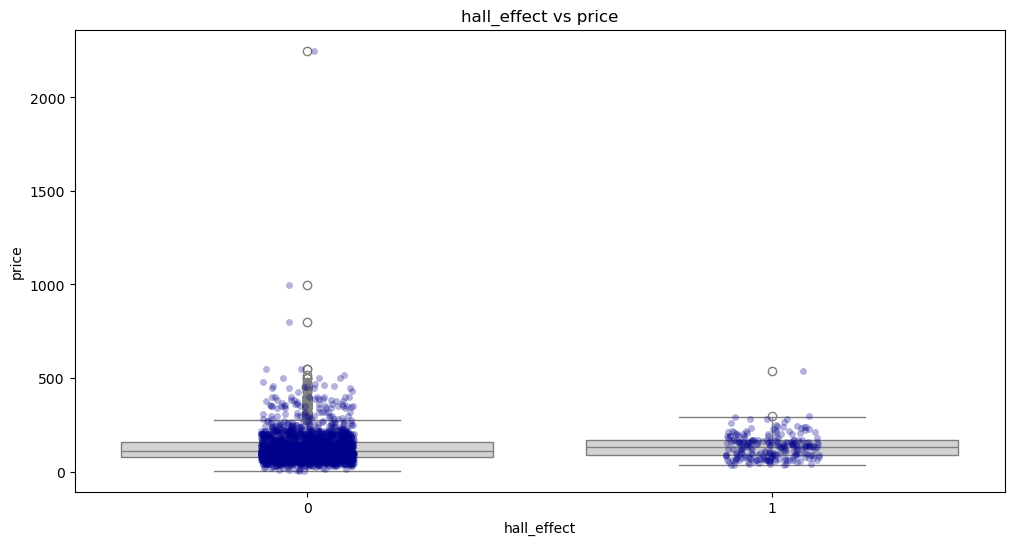

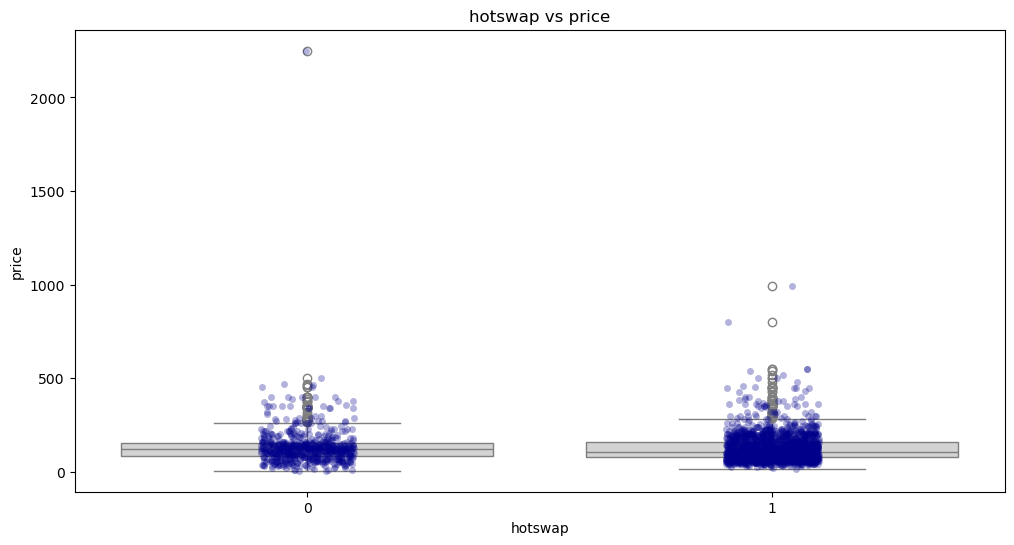

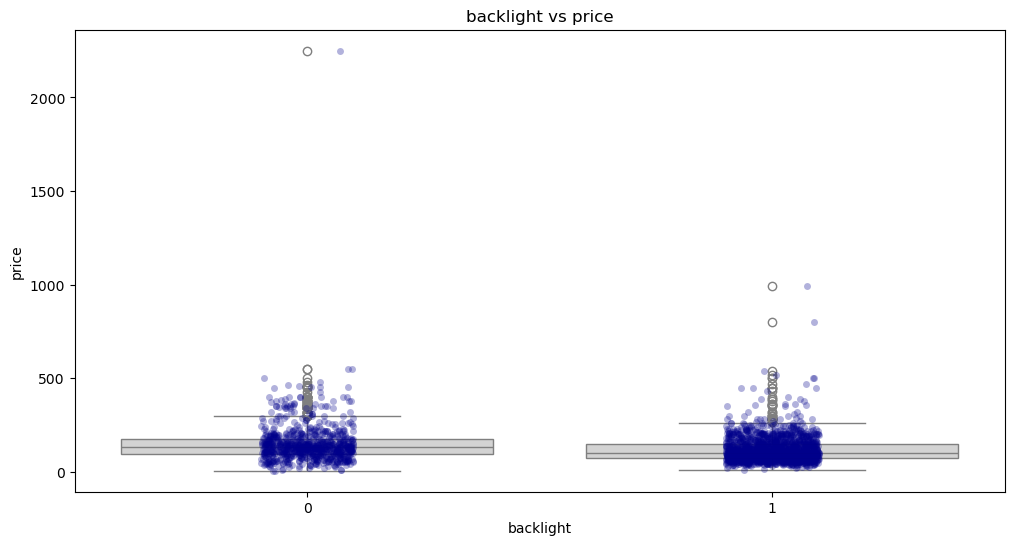

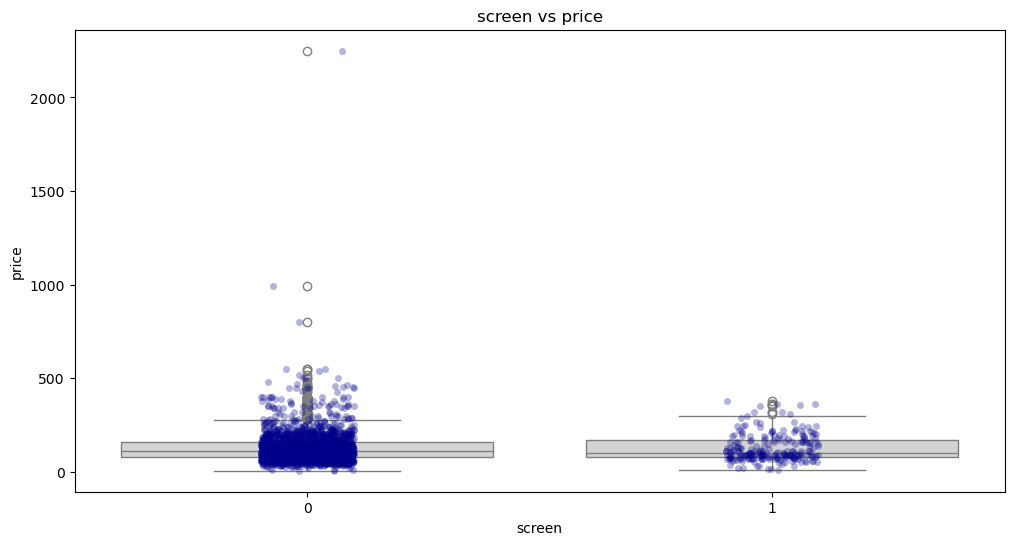

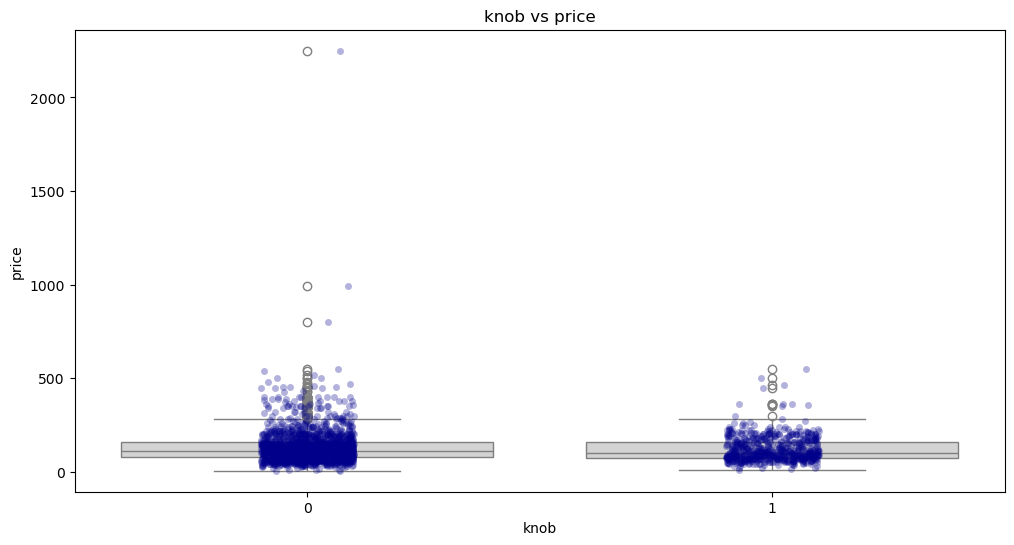

In [50]:
# binary features vs price
binary_features = ['hall_effect', 'hotswap', 'backlight', 'screen', 'knob']
for feature in binary_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=feature, y='price', color='lightgray')
    sns.stripplot(data=df, x=feature, y='price', color='darkblue', alpha=0.3, jitter=True)
    plt.title(f'{feature} vs price')
    plt.show()



### categorical cols

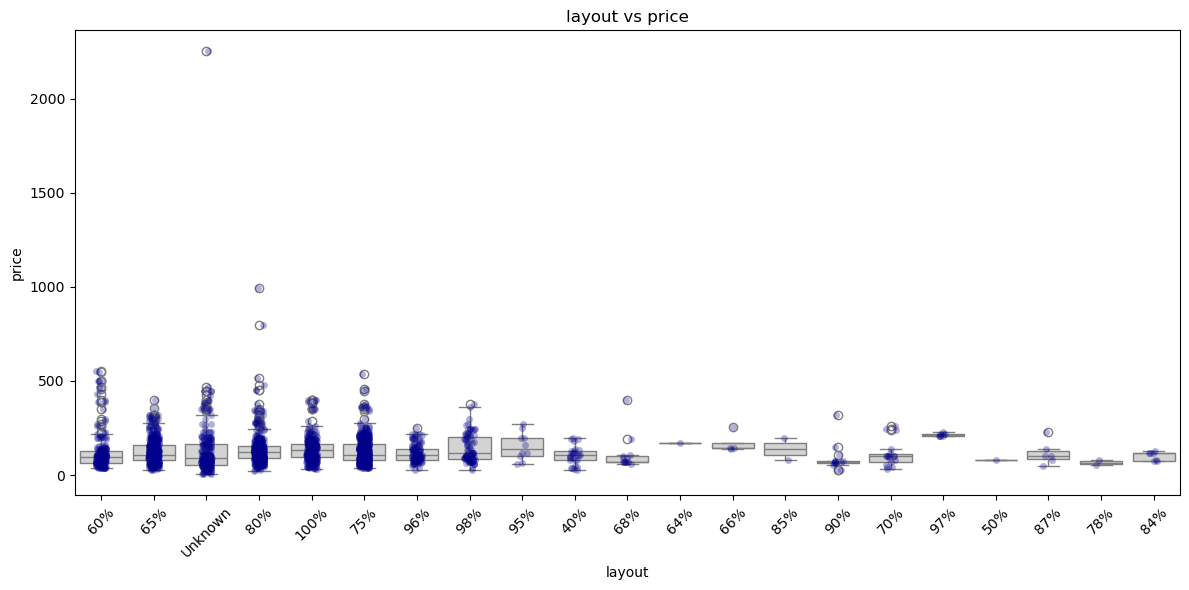

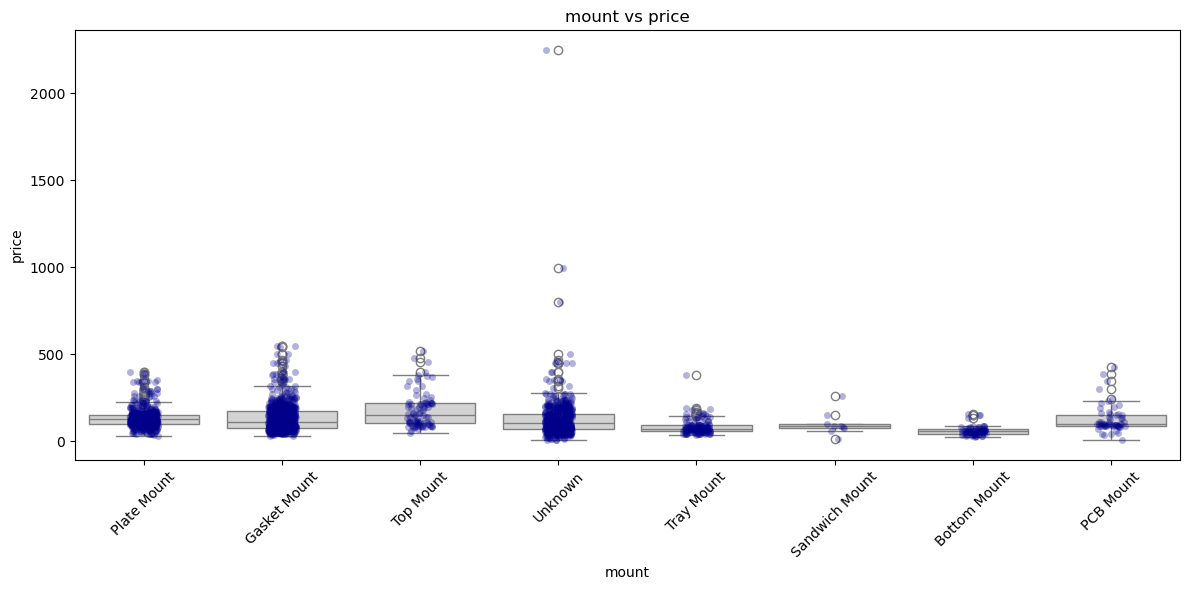

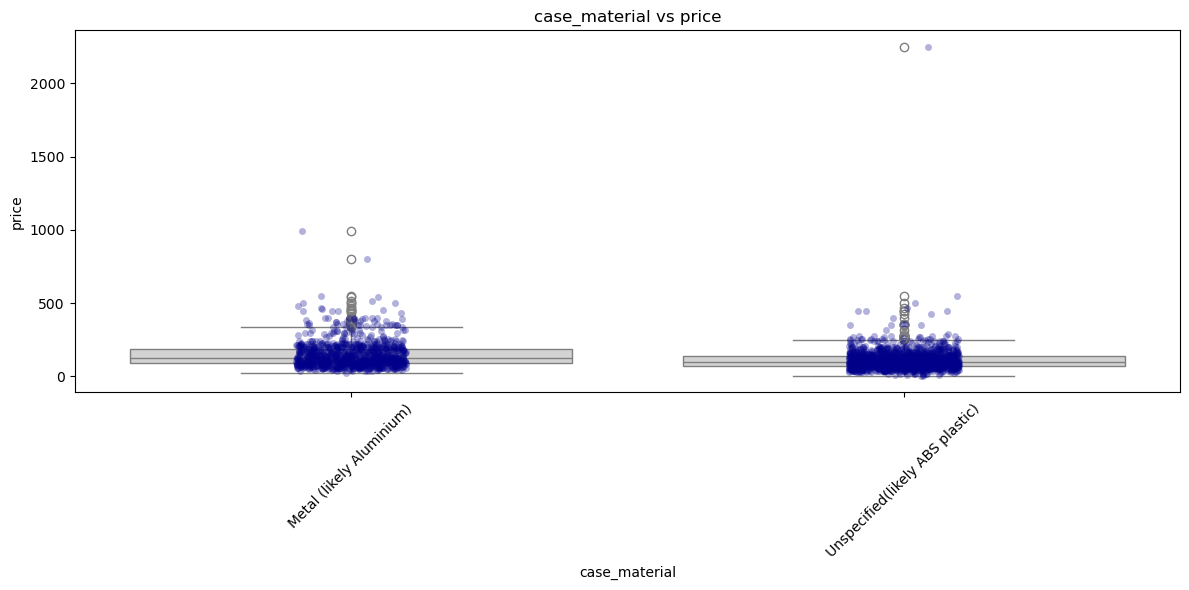

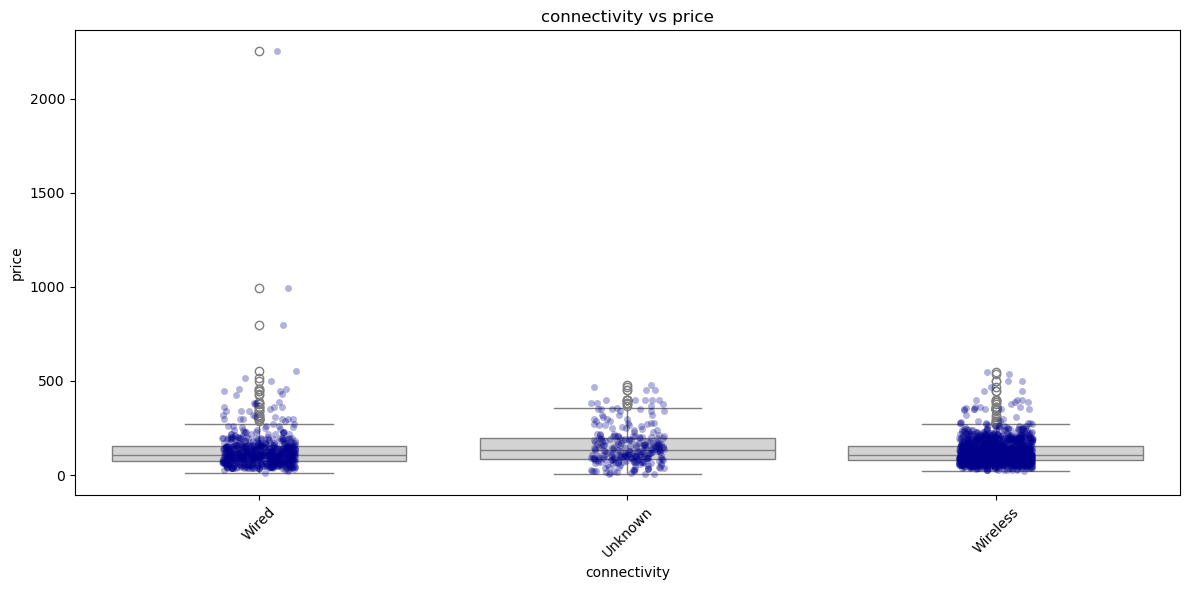

In [51]:
# categorical features vs price
categorical_features = ['layout', 'mount', 'case_material', 'connectivity']
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=feature, y='price', color='lightgray')
    sns.stripplot(data=df, x=feature, y='price', color='darkblue', alpha=0.3, jitter=True)
    plt.title(f'{feature} vs price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## does brand category have an impact on price?

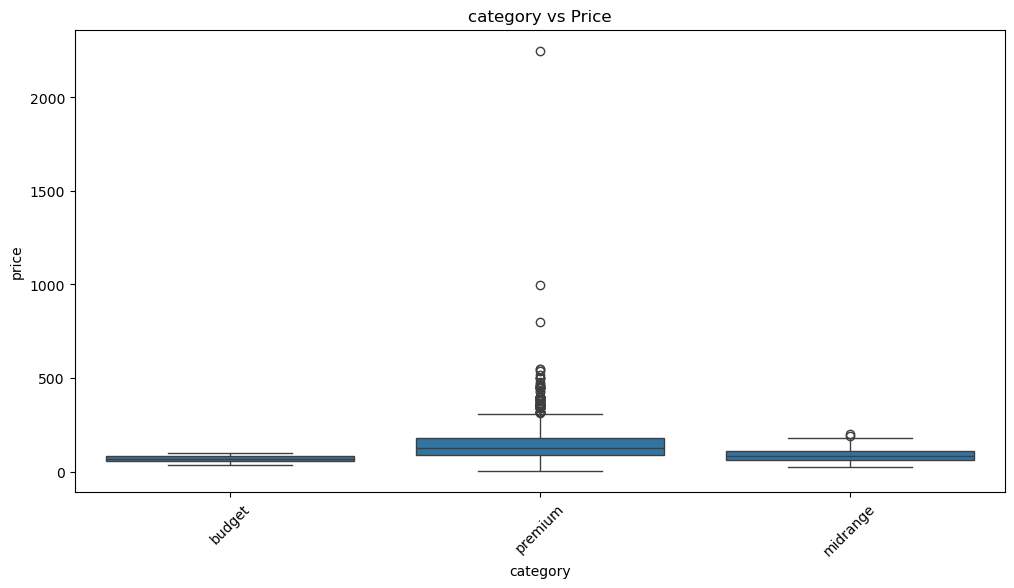

In [52]:
# does tier of brand have an impact on price
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='category', y='price')
plt.title('category vs Price')
plt.xticks(rotation=45)
plt.show()

## are some features disproportionately present in certain price brackets?


<Figure size 1200x600 with 0 Axes>

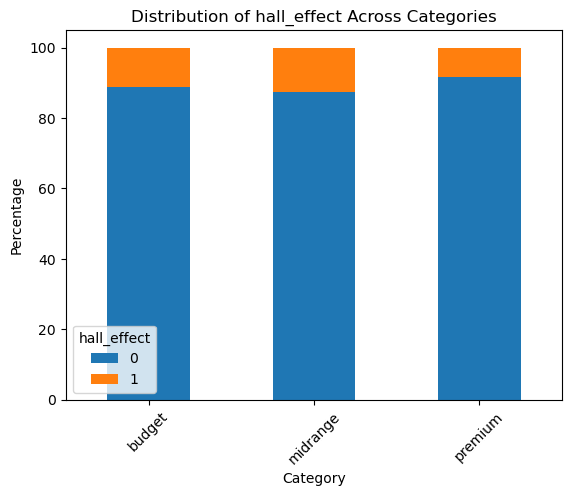

<Figure size 1200x600 with 0 Axes>

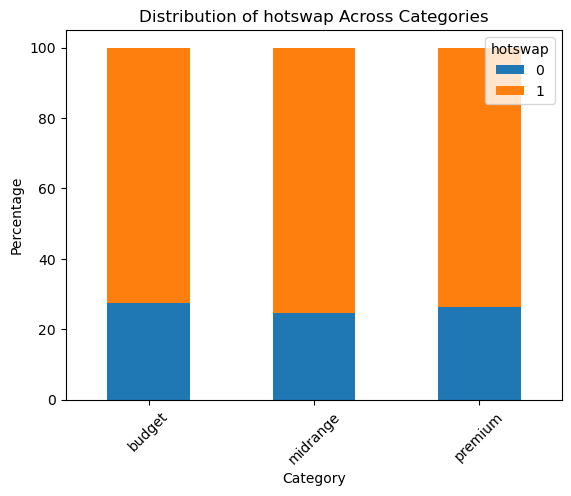

<Figure size 1200x600 with 0 Axes>

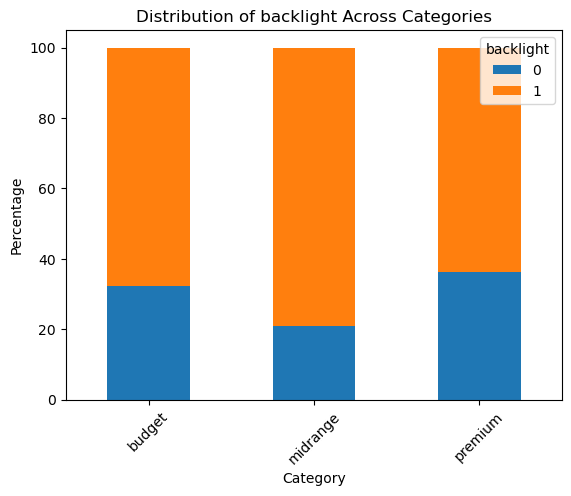

<Figure size 1200x600 with 0 Axes>

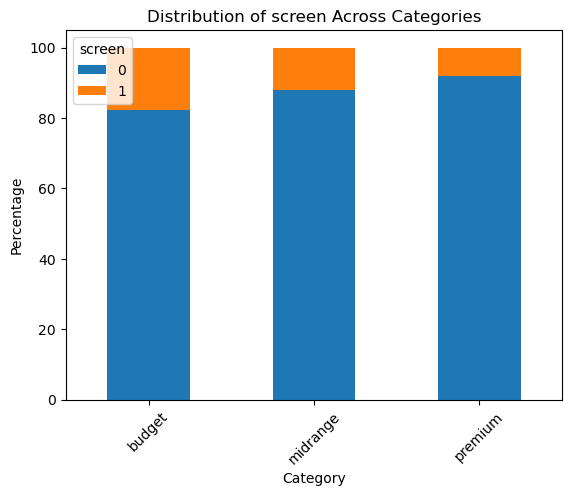

<Figure size 1200x600 with 0 Axes>

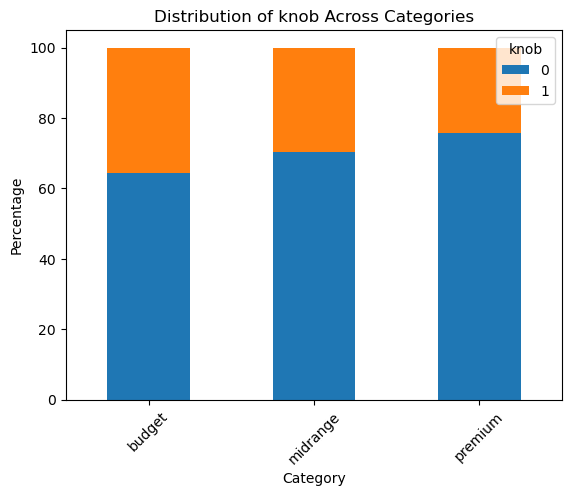

In [53]:
# cinary features
binary_features = ['hall_effect', 'hotswap', 'backlight', 'screen', 'knob']
for feature in binary_features:
    plt.figure(figsize=(12, 6))
    feature_by_category = pd.crosstab(df['category'], df[feature], normalize='index') * 100
    feature_by_category.plot(kind='bar', stacked=True)
    plt.title(f'Distribution of {feature} Across Categories')
    plt.xlabel('Category')
    plt.ylabel('Percentage')
    plt.legend(title=feature)
    plt.xticks(rotation=45)
    plt.show()

<Figure size 1200x600 with 0 Axes>

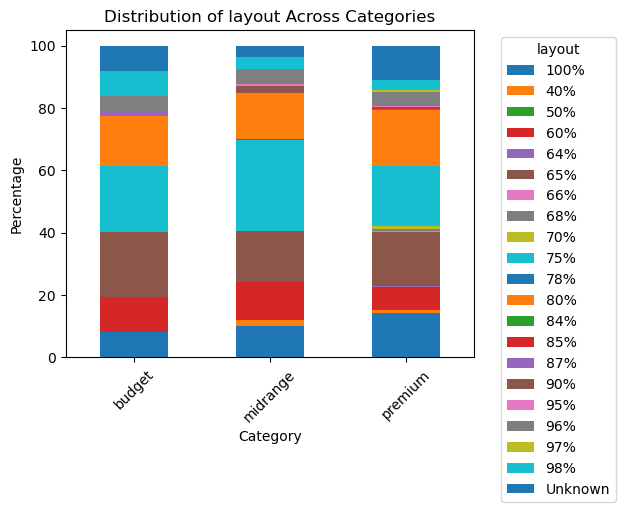

<Figure size 1200x600 with 0 Axes>

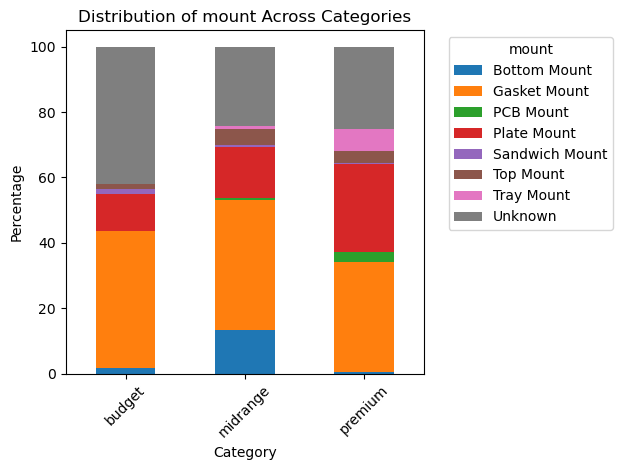

<Figure size 1200x600 with 0 Axes>

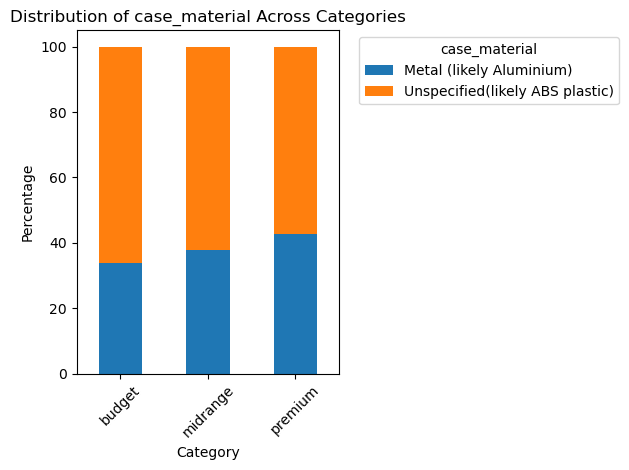

<Figure size 1200x600 with 0 Axes>

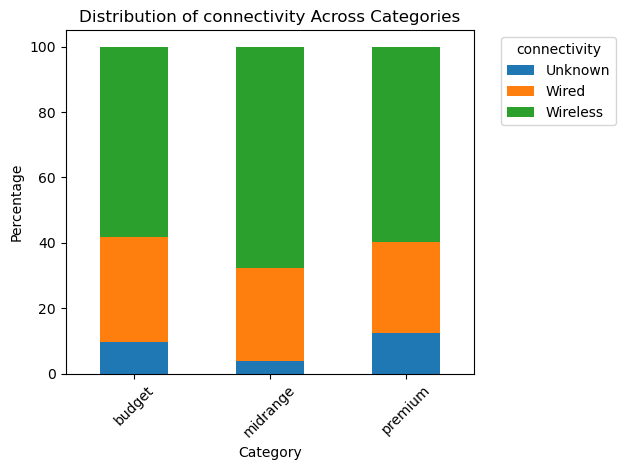

In [54]:
# categorical features
categorical_features = ['layout', 'mount', 'case_material', 'connectivity']
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    feature_by_category = pd.crosstab(df['category'], df[feature], normalize='index') * 100
    feature_by_category.plot(kind='bar', stacked=True)
    plt.title(f'Distribution of {feature} Across Categories')
    plt.xlabel('Category')
    plt.ylabel('Percentage')
    plt.legend(title=feature, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

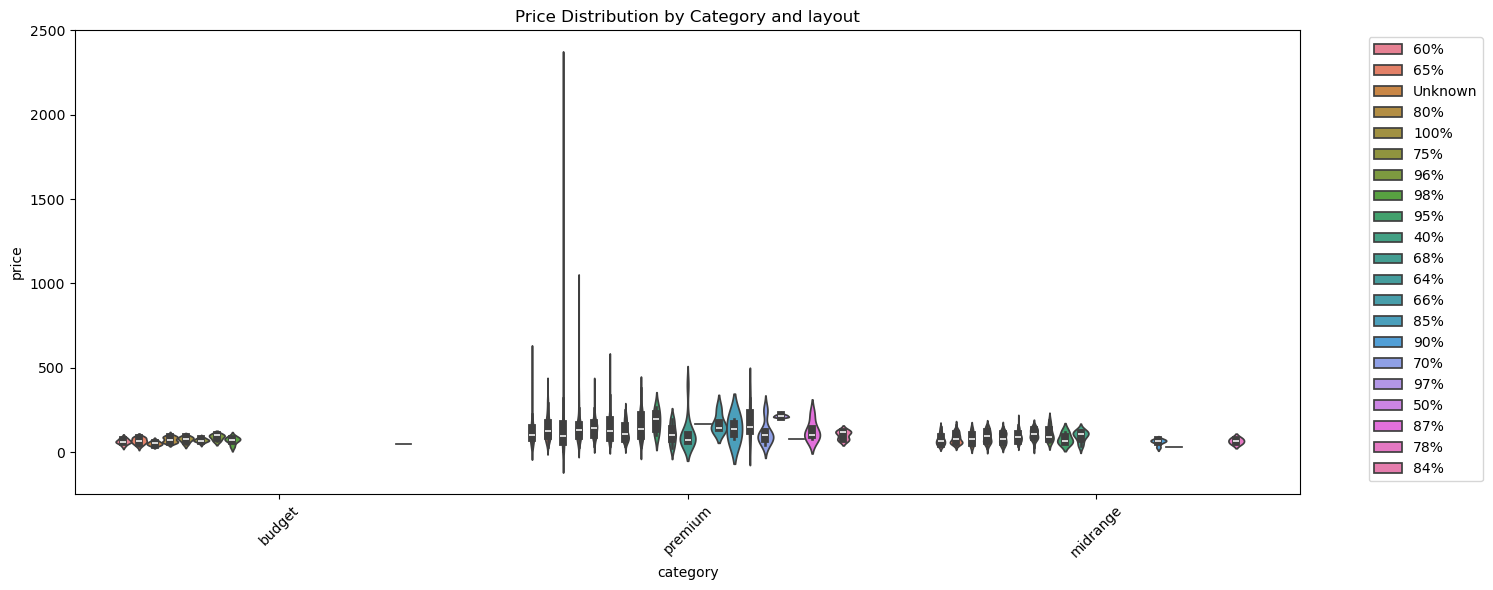

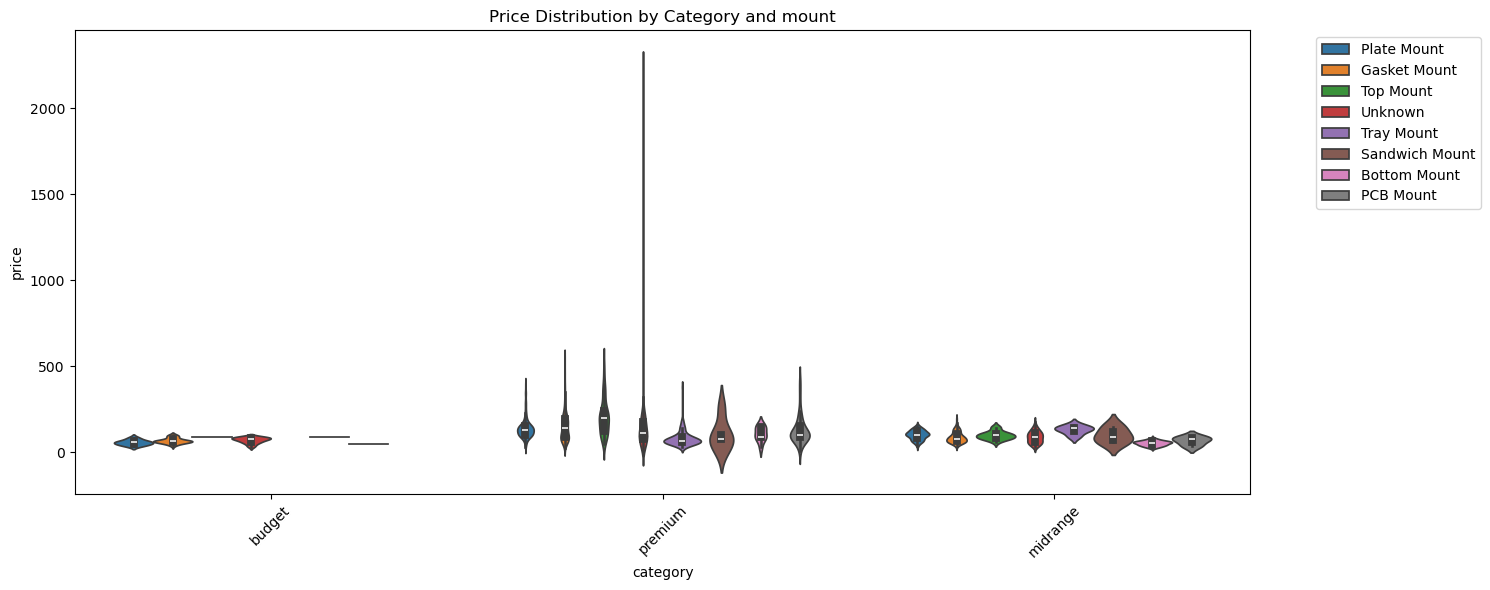

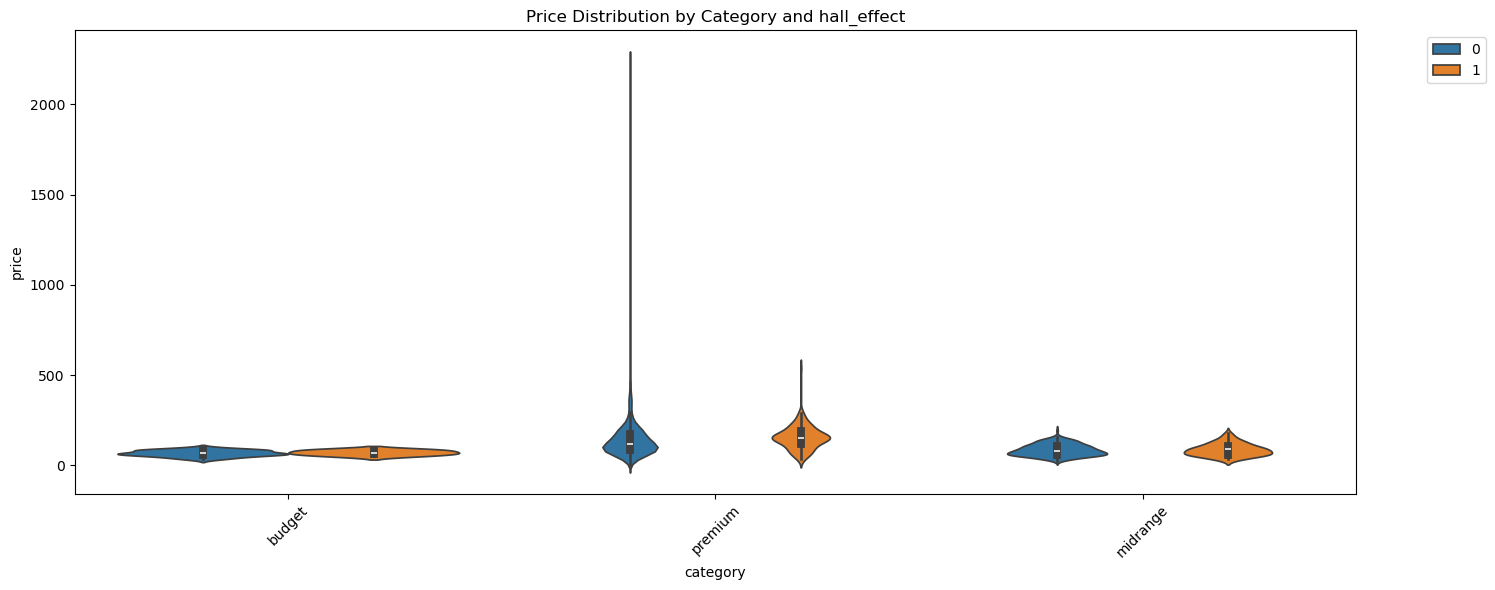

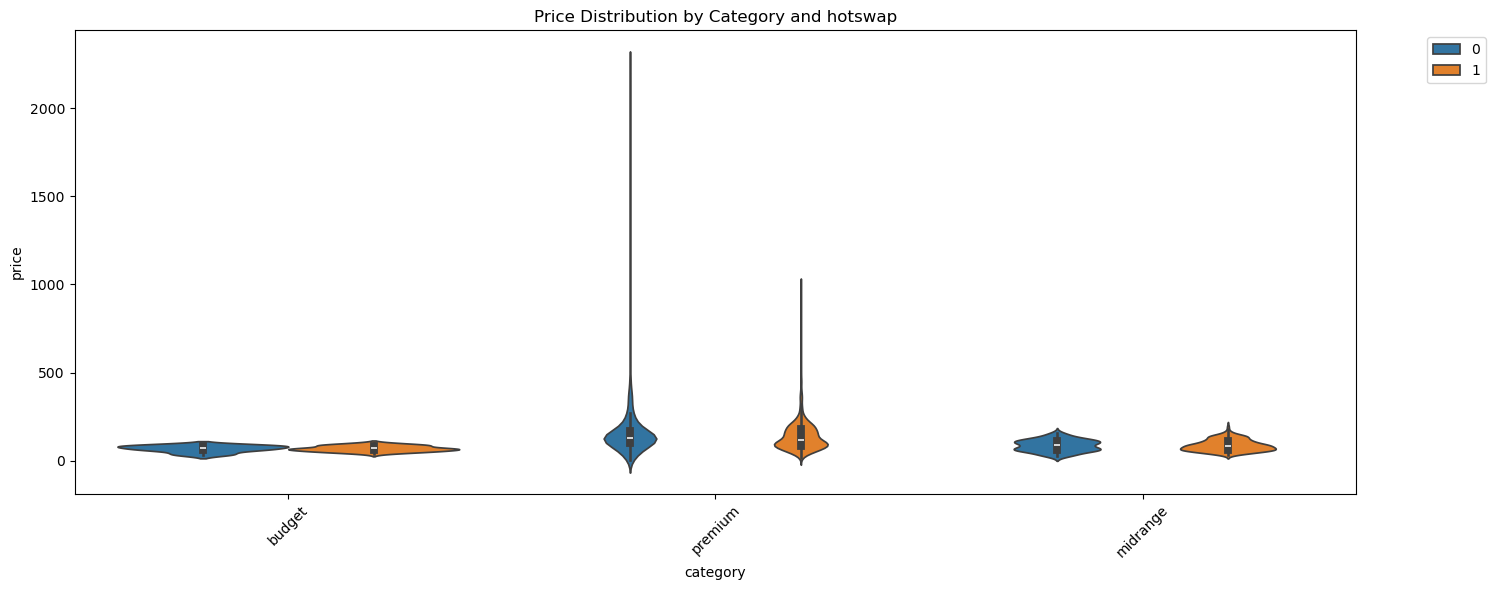

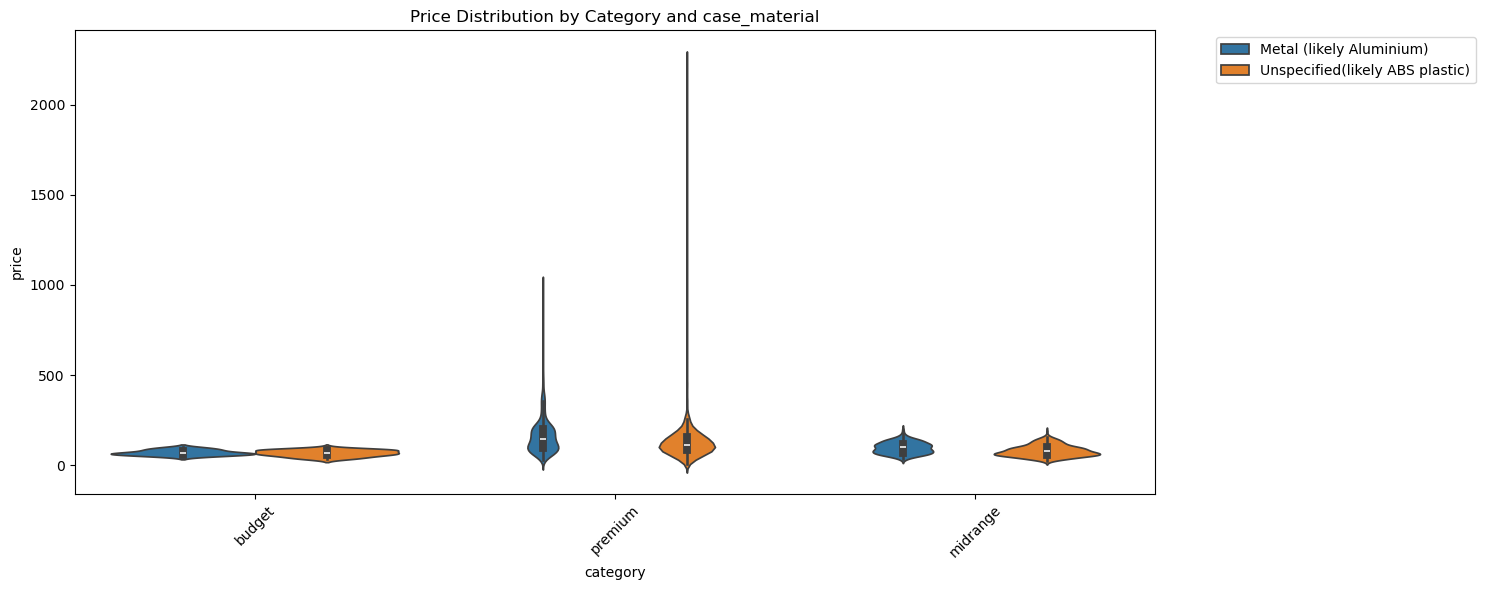

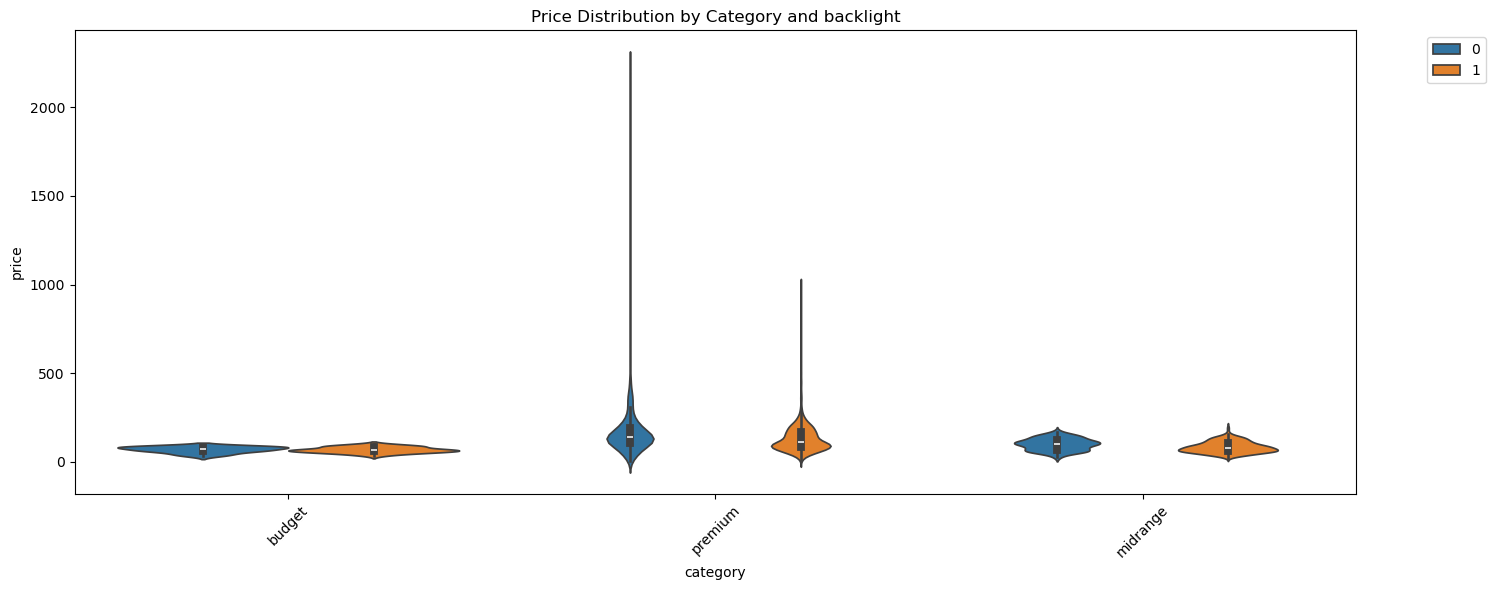

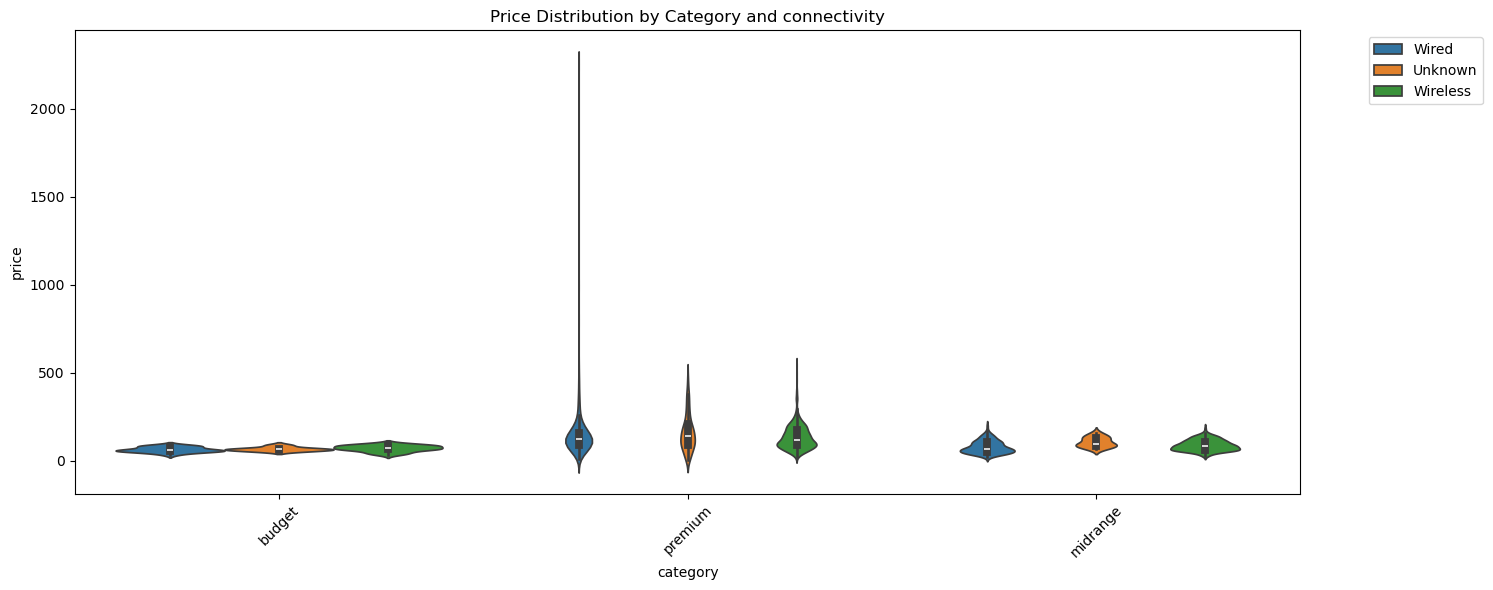

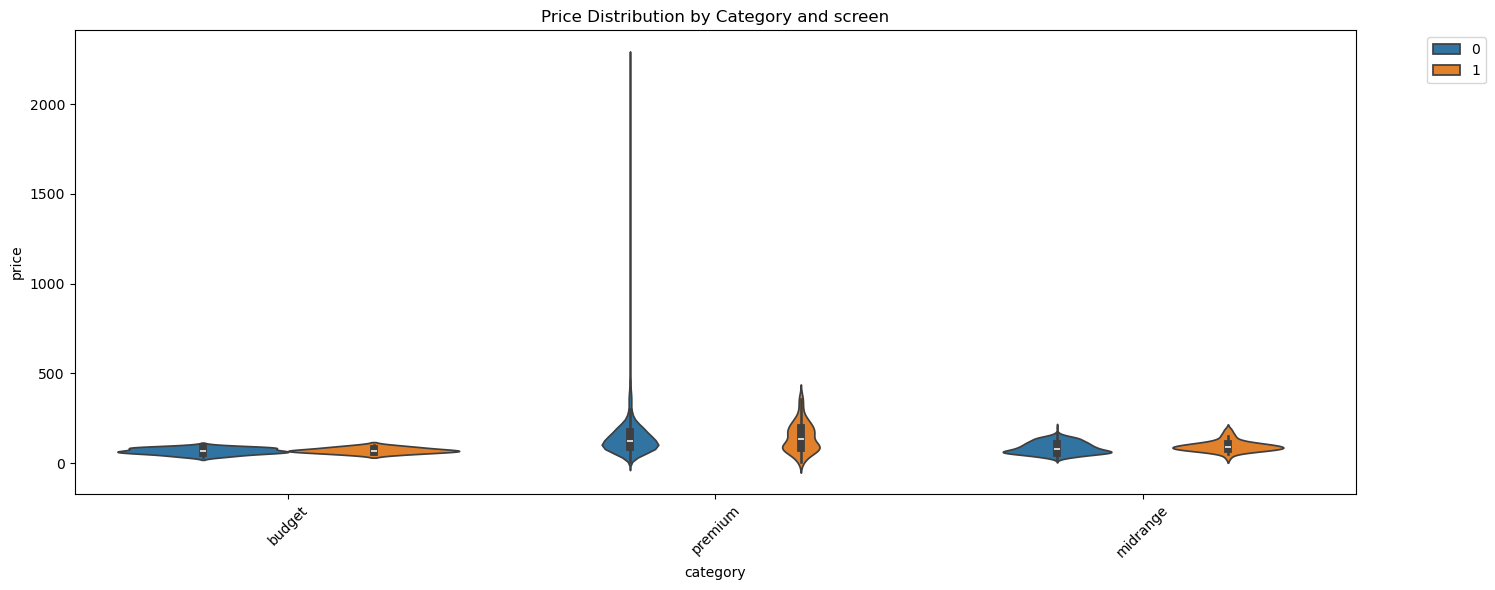

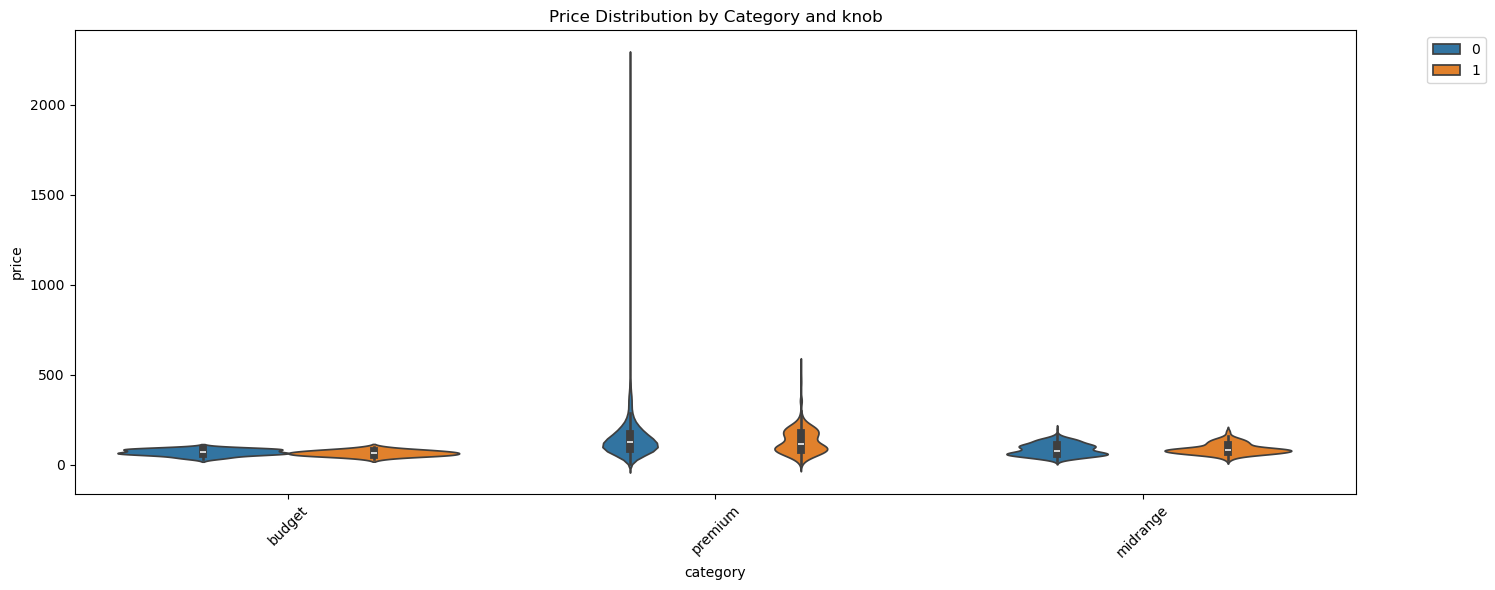

In [55]:
features = ['layout', 'mount', 'hall_effect', 'hotswap', 'case_material', 'backlight', 'connectivity', 'screen', 'knob']

for feature in features:
    plt.figure(figsize=(15, 6))
    sns.violinplot(data=df, x='category', y='price', hue=feature)
    plt.title(f'Price Distribution by Category and {feature}')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

## Are any features strongly correlated?
## Are there interactions? (e.g., Premium + Wireless = Higher Price?)



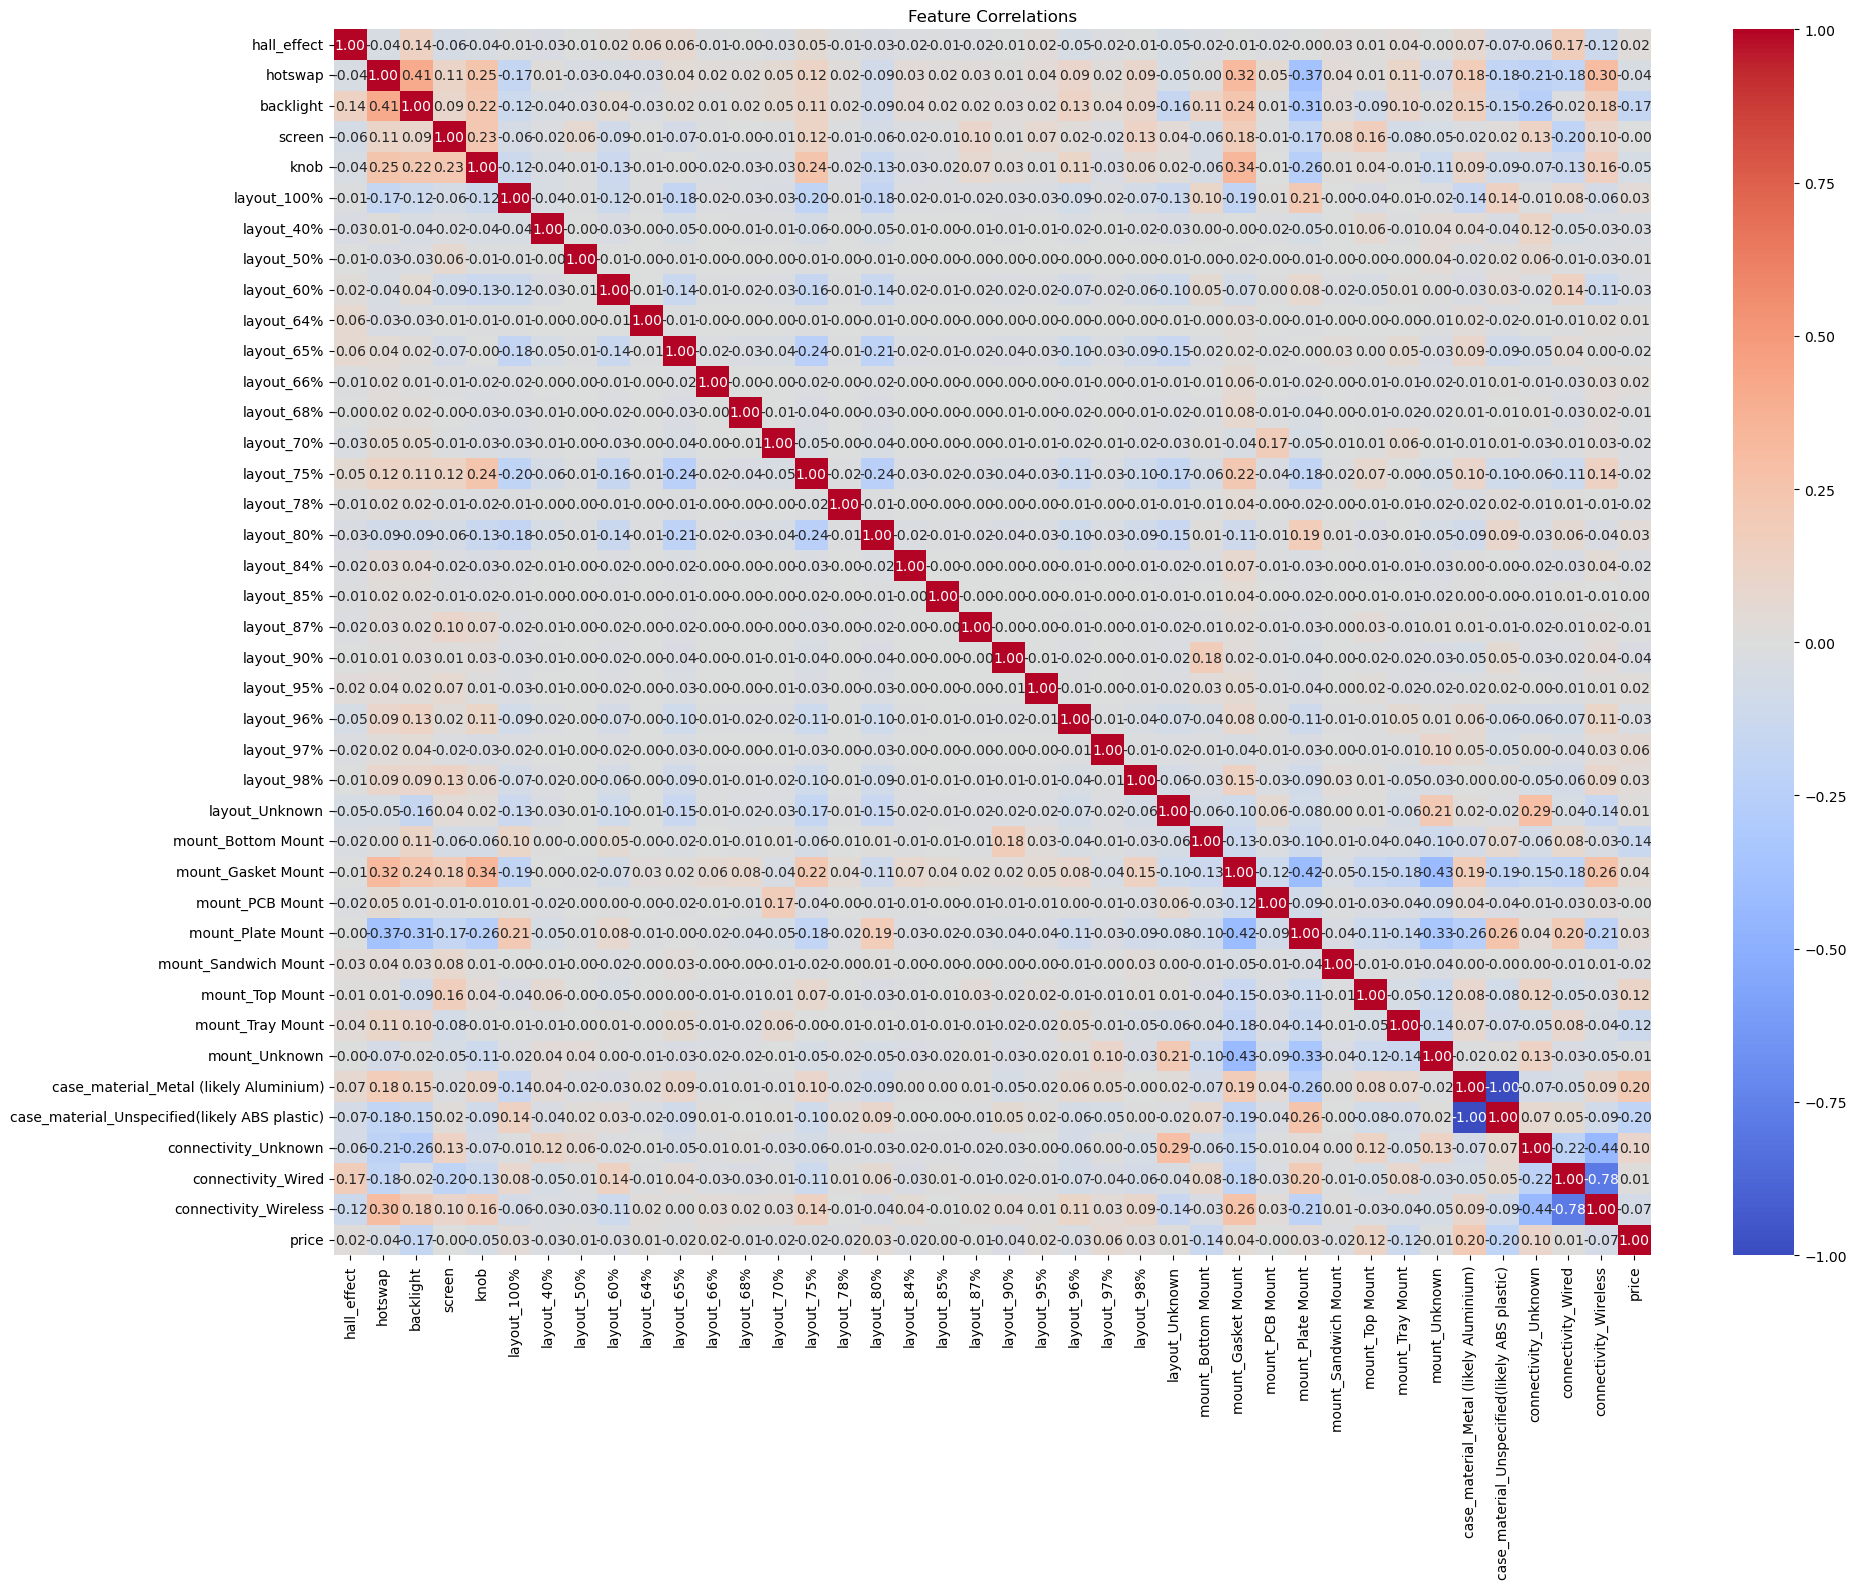

In [56]:
#!GPT CODE

# First convert categorical variables to dummy variables (one-hot encoding)
# Get dummies for categorical features
categorical_features = ['layout', 'mount', 'case_material', 'connectivity']
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Include binary features and price
binary_features = ['hall_effect', 'hotswap', 'backlight', 'screen', 'knob']
features_for_correlation = binary_features + [col for col in df_encoded.columns if any(feat in col for feat in categorical_features)] + ['price']

# Create correlation matrix
correlation_matrix = df_encoded[features_for_correlation].corr()

# Create heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlations')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()